In [121]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings
import graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import pydotplus     # Anaconda Prompt에서 pip install pydotplus 라고 치면 pydotplus가 설치된다.
import os

warnings.filterwarnings(action='ignore')

In [122]:
care_data = pd.read_csv('/home/salmon10/care/fia_uplc_total.csv')
care_data

,C0,C2,C3,C3.DC..C4.OH.,C3.OH,C3.1,C4,C4.1,C5,C5.DC..C6.OH.,...,Met.SO,Putrescine,Sarcosine,SDMA,Serotonin,Spermidine,Spermine,t4.OH.Pro,Taurine,Response
0,5.361554,2.881123,-1.822915,-3.706124,-4.587969,-4.494403,-2.707766,-4.561210,-3.078127,-4.633250,...,-0.070140,-2.886585,1.678481,-1.242249,-3.815743,-2.065846,-2.504305,3.720203,6.508506,Non-Response
1,4.867096,3.037732,-2.215942,-4.048670,-4.952500,-4.812930,-2.782433,-4.895482,-3.277169,-4.893213,...,-0.256796,-2.937211,1.723910,-0.954223,-1.964425,-2.391469,-2.627161,3.686913,6.061656,Non-Response
2,5.252625,2.943157,-1.668455,-3.657480,-4.558221,-4.475895,-2.275842,-4.480444,-2.705753,-4.548077,...,-1.320927,-3.467726,1.829843,-1.039953,-4.822406,-2.473931,-2.627161,2.969209,7.055013,Non-Response
3,5.396829,2.788545,-0.738963,-2.409552,-4.104503,-4.060858,-1.466487,-4.088127,-1.828812,-4.171929,...,0.249389,-3.052689,2.373069,-0.700467,-4.822406,-2.561394,-2.627161,3.841241,6.554638,Non-Response
4,4.923855,1.417803,-2.706511,-3.689660,-4.434085,-4.394059,-2.937676,-4.369023,-3.747692,-4.619830,...,0.005461,-3.972315,1.035039,-1.162565,-2.090602,-2.721859,-2.854248,3.334752,5.486608,Non-Response
5,4.714104,4.433923,-2.420393,-1.912854,-4.106031,-3.994452,-2.760371,-3.909592,-3.318299,-3.555700,...,-1.161189,-3.320238,1.515550,-1.037034,-1.631171,-2.329541,-2.693783,2.297501,6.370094,Non-Response
6,4.993564,2.832841,-1.879348,-3.896111,-4.496821,-4.304792,-2.152688,-4.399397,-3.500777,-4.494299,...,-0.221310,-3.609745,1.549612,-1.130144,-3.090602,-2.814968,-4.643856,2.614194,6.046480,Non-Response
7,5.414317,2.622694,-1.866533,-3.471613,-4.655519,-4.569005,-2.340290,-4.639142,-3.418723,-4.817264,...,-0.841759,-3.637651,1.584573,-1.406736,-3.362975,-2.313467,-2.726697,3.353303,6.509999,Non-Response
8,5.244826,2.733092,-0.907953,-3.536464,-4.409358,-4.332937,-2.392487,-4.337486,-2.464047,-4.487956,...,2.577194,-3.178219,1.812719,-1.369261,-3.652481,-1.976432,-2.010490,3.830749,6.774112,Non-Response
9,5.021924,1.633450,-1.880736,-3.997587,-4.753979,-4.751561,-2.796424,-4.658508,-3.513513,-4.770754,...,0.449867,-4.265097,1.304415,-1.045212,-0.692360,-2.501945,-2.710756,3.218161,6.087127,Non-Response


In [123]:
care_data.Response = care_data.Response.replace(['Response','Non-Response'], [0,1])
care_data

,C0,C2,C3,C3.DC..C4.OH.,C3.OH,C3.1,C4,C4.1,C5,C5.DC..C6.OH.,...,Met.SO,Putrescine,Sarcosine,SDMA,Serotonin,Spermidine,Spermine,t4.OH.Pro,Taurine,Response
0,5.361554,2.881123,-1.822915,-3.706124,-4.587969,-4.494403,-2.707766,-4.561210,-3.078127,-4.633250,...,-0.070140,-2.886585,1.678481,-1.242249,-3.815743,-2.065846,-2.504305,3.720203,6.508506,1
1,4.867096,3.037732,-2.215942,-4.048670,-4.952500,-4.812930,-2.782433,-4.895482,-3.277169,-4.893213,...,-0.256796,-2.937211,1.723910,-0.954223,-1.964425,-2.391469,-2.627161,3.686913,6.061656,1
2,5.252625,2.943157,-1.668455,-3.657480,-4.558221,-4.475895,-2.275842,-4.480444,-2.705753,-4.548077,...,-1.320927,-3.467726,1.829843,-1.039953,-4.822406,-2.473931,-2.627161,2.969209,7.055013,1
3,5.396829,2.788545,-0.738963,-2.409552,-4.104503,-4.060858,-1.466487,-4.088127,-1.828812,-4.171929,...,0.249389,-3.052689,2.373069,-0.700467,-4.822406,-2.561394,-2.627161,3.841241,6.554638,1
4,4.923855,1.417803,-2.706511,-3.689660,-4.434085,-4.394059,-2.937676,-4.369023,-3.747692,-4.619830,...,0.005461,-3.972315,1.035039,-1.162565,-2.090602,-2.721859,-2.854248,3.334752,5.486608,1
5,4.714104,4.433923,-2.420393,-1.912854,-4.106031,-3.994452,-2.760371,-3.909592,-3.318299,-3.555700,...,-1.161189,-3.320238,1.515550,-1.037034,-1.631171,-2.329541,-2.693783,2.297501,6.370094,1
6,4.993564,2.832841,-1.879348,-3.896111,-4.496821,-4.304792,-2.152688,-4.399397,-3.500777,-4.494299,...,-0.221310,-3.609745,1.549612,-1.130144,-3.090602,-2.814968,-4.643856,2.614194,6.046480,1
7,5.414317,2.622694,-1.866533,-3.471613,-4.655519,-4.569005,-2.340290,-4.639142,-3.418723,-4.817264,...,-0.841759,-3.637651,1.584573,-1.406736,-3.362975,-2.313467,-2.726697,3.353303,6.509999,1
8,5.244826,2.733092,-0.907953,-3.536464,-4.409358,-4.332937,-2.392487,-4.337486,-2.464047,-4.487956,...,2.577194,-3.178219,1.812719,-1.369261,-3.652481,-1.976432,-2.010490,3.830749,6.774112,1
9,5.021924,1.633450,-1.880736,-3.997587,-4.753979,-4.751561,-2.796424,-4.658508,-3.513513,-4.770754,...,0.449867,-4.265097,1.304415,-1.045212,-0.692360,-2.501945,-2.710756,3.218161,6.087127,1


In [124]:
X = np.array(pd.DataFrame(care_data,
                          columns= ['C0', 'C2', 'C3', 'C3.DC..C4.OH.', 'C3.OH', 'C3.1', 'C4', 'C4.1', 'C5', 'C5.DC..C6.OH.', 'C5.M.DC', 'C5.OH..C3.DC.M.', 'C5.1', 'C5.1.DC', 'C6..C4.1.DC.', 'C6.1', 'C7.DC', 'C8', 'C9', 'C10', 'C10.2', 'C12', 'C14.1', 'C14.1.OH', 'C14.2', 'C14.2.OH', 'C16', 'C16.OH', 'C16.1', 'C16.1.OH', 'C16.2', 'C16.2.OH', 'C18', 'C18.1', 'C18.1.OH', 'C18.2', 'lysoPC.a.C16.0',
                                    'lysoPC.a.C16.1', 'lysoPC.a.C17.0', 'lysoPC.a.C18.0', 'lysoPC.a.C18.1', 'lysoPC.a.C18.2', 'lysoPC.a.C20.3', 'lysoPC.a.C20.4', 'lysoPC.a.C24.0', 'lysoPC.a.C26.0', 'lysoPC.a.C26.1', 'lysoPC.a.C28.0', 'lysoPC.a.C28.1', 'PC.aa.C24.0', 'PC.aa.C28.1', 'PC.aa.C30.0', 'PC.aa.C32.0', 'PC.aa.C32.1', 'PC.aa.C32.3', 'PC.aa.C34.1', 'PC.aa.C34.2', 'PC.aa.C34.3', 'PC.aa.C34.4',
                                    'PC.aa.C36.1', 'PC.aa.C36.2', 'PC.aa.C36.3', 'PC.aa.C36.4', 'PC.aa.C36.5', 'PC.aa.C36.6', 'PC.aa.C38.0', 'PC.aa.C38.3', 'PC.aa.C38.4', 'PC.aa.C38.5', 'PC.aa.C38.6', 'PC.aa.C40.2', 'PC.aa.C40.3', 'PC.aa.C40.4', 'PC.aa.C40.5', 'PC.aa.C40.6', 'PC.aa.C42.0',
                                    'PC.aa.C42.1', 'PC.aa.C42.2', 'PC.aa.C42.4', 'PC.aa.C42.5', 'PC.aa.C42.6', 'PC.ae.C30.0', 'PC.ae.C30.2', 'PC.ae.C32.1', 'PC.ae.C32.2', 'PC.ae.C34.0', 'PC.ae.C34.1', 'PC.ae.C34.2', 'PC.ae.C34.3', 'PC.ae.C36.0', 'PC.ae.C36.1', 'PC.ae.C36.2', 'PC.ae.C36.3', 'PC.ae.C36.4', 'PC.ae.C36.5', 'PC.ae.C38.0', 'PC.ae.C38.2', 'PC.ae.C38.3', 'PC.ae.C38.4', 'PC.ae.C38.5',
                                    'PC.ae.C38.6', 'PC.ae.C40.1', 'PC.ae.C40.2', 'PC.ae.C40.3', 'PC.ae.C40.4', 'PC.ae.C40.5', 'PC.ae.C40.6', 'PC.ae.C42.1', 'PC.ae.C42.2', 'PC.ae.C42.3', 'PC.ae.C42.4', 'PC.ae.C42.5', 'PC.ae.C44.3', 'PC.ae.C44.4', 'PC.ae.C44.5', 'PC.ae.C44.6', 'SM..OH..C14.1', 'SM..OH..C16.1', 'SM..OH..C22.1', 'SM..OH..C22.2', 'SM..OH..C24.1', 'SM.C16.0', 'SM.C16.1', 'SM.C18.0',
                                    'SM.C18.1', 'SM.C20.2', 'SM.C24.0', 'SM.C24.1', 'SM.C26.0', 'SM.C26.1', 'Ala', 'Arg', 'Asn', 'Asp', 'Cit', 'Gln', 'Glu', 'Gly', 'His', 'Ile', 'Lys', 'Met', 'Orn', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 'Tyr', 'Val', 'ADMA', 'alpha.AAA', 'Creatinine', 'Kynurenine', 'Met.SO', 'Putrescine', 'Sarcosine', 'SDMA', 'Serotonin', 'Spermidine', 'Spermine', 't4.OH.Pro', 'Taurine']))
y = np.array(pd.DataFrame(care_data, columns=["Response"]))

train/test accuracies 0.931/0.670


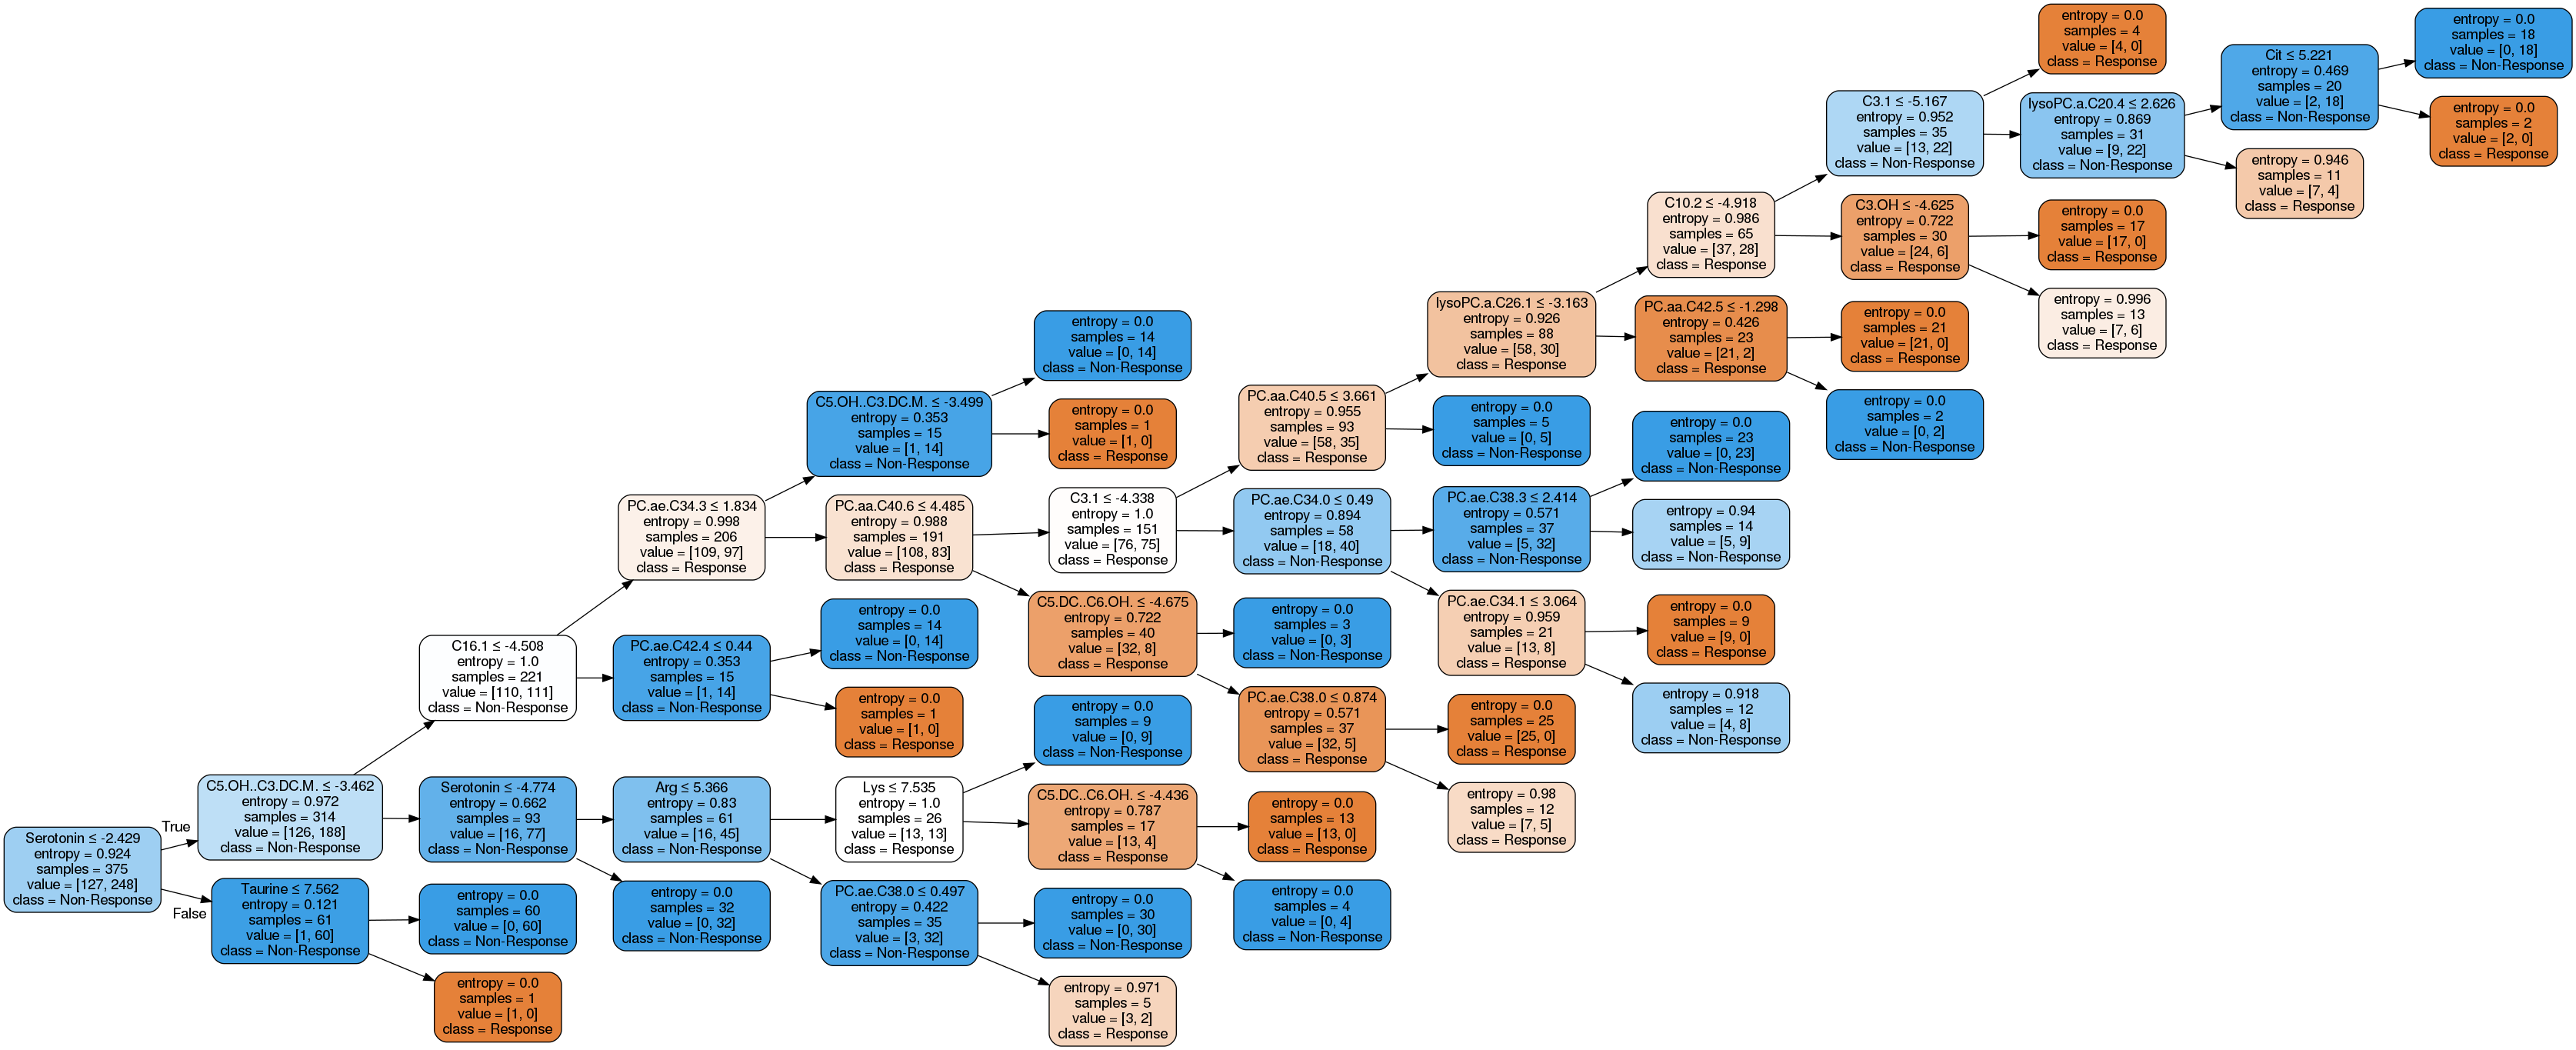

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.65)
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth = 15,
                                random_state = 10, min_samples_split = 15)
dt_clf = dt_clf.fit(X_train, y_train)
dt_prediction = dt_clf.predict(X_test)

y_train_pred = dt_clf.predict(X_train)
y_test_pred = dt_clf.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('train/test accuracies %.3f/%.3f' % (tree_train, tree_test))

feature_names = care_data.columns.tolist()
feature_names = feature_names[0:163]
target_name = np.array(['Response','Non-Response'])

dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True,
                                  rotate= True)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75)
est = 100;
max = 2;
plot_train = []
plot_test = []
for i in range(20):
    dt_clf = RandomForestClassifier(n_estimators= est, criterion='entropy', max_depth = max,
                                random_state = 100, min_samples_split = 10)
    dt_clf = dt_clf.fit(X_train, y_train)
    dt_prediction = dt_clf.predict(X_test)
    y_train_pred = dt_clf.predict(X_train)
    y_test_pred = dt_clf.predict(X_test)
    tree_train = accuracy_score(y_train, y_train_pred)
    tree_test = accuracy_score(y_test, y_test_pred)
    print('max_depth = %d train/test accuracies %.3f/%.3f' % (max, tree_train, tree_test))
    plot_train.append(tree_train)
    plot_test.append(tree_test)
    max = max+1


max_depth = 2 train/test accuracies 0.711/0.600
max_depth = 3 train/test accuracies 0.732/0.607
max_depth = 4 train/test accuracies 0.744/0.607
max_depth = 5 train/test accuracies 0.794/0.621
max_depth = 6 train/test accuracies 0.880/0.621
max_depth = 7 train/test accuracies 0.933/0.614
max_depth = 8 train/test accuracies 0.982/0.607
max_depth = 9 train/test accuracies 0.993/0.600
max_depth = 10 train/test accuracies 0.986/0.628
max_depth = 11 train/test accuracies 0.995/0.607
max_depth = 12 train/test accuracies 0.993/0.579
max_depth = 13 train/test accuracies 0.998/0.614
max_depth = 14 train/test accuracies 0.998/0.614
max_depth = 15 train/test accuracies 0.998/0.607
max_depth = 16 train/test accuracies 0.998/0.600
max_depth = 17 train/test accuracies 0.998/0.600
max_depth = 18 train/test accuracies 0.998/0.600
max_depth = 19 train/test accuracies 0.998/0.600
max_depth = 20 train/test accuracies 0.998/0.600
max_depth = 21 train/test accuracies 0.998/0.600


<function matplotlib.pyplot.show(*args, **kw)>

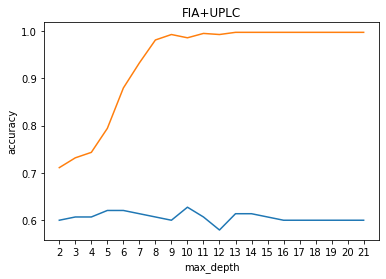

In [149]:
a = np.array(np.arange(2,22,1))
plt.plot(a, plot_test)
plt.plot(a, plot_train)
plt.ylabel("accuracy")
plt.xlabel("max_depth")
plt.title("FIA+UPLC")
plt.xticks(a)
plt.show